In [ ]:
### Deep Learning

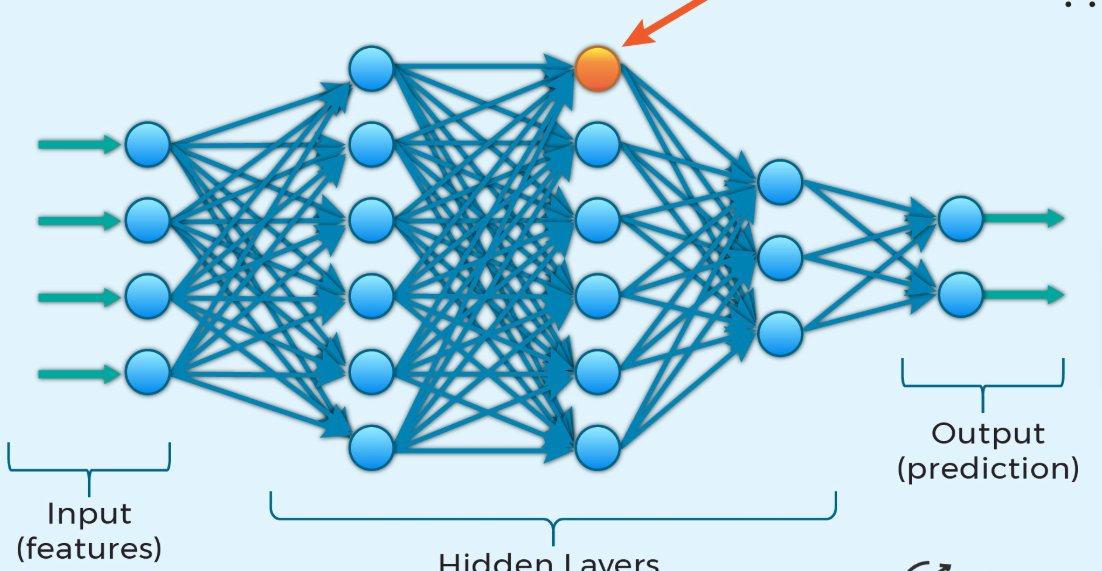

In [ ]:
### No of input layer=1 ,N. of output layer->1
### No.hidden layers-> No idea(It depends upon the data)

### No.neurons in i/p layer-> No.Pixels

### No.neurons in o/p-> no.classes

### No.neuroons in hidden layer -> No idea(depends upon the data)

In [ ]:
### No.input layers-> 1
### No. neurons in input layer -> (28 x28= 784)
### No.output layers-> 1
### No.neurons in output layer->10

### No.hidden layers,No.neurons-> No idea

### Epochs -> 10(same model visit the data 10 times)

### Number of epochs-> No idea

### Overlearning-> Saturation,confusion(accuracy may go down)

### Still not good-> Switch to different architecture

In [ ]:
# prompt: Build a simple ANN model for MNIST

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the model
model = Sequential([
  Flatten(input_shape=(784,)), # Input layer
  Dense(128, activation='relu'), # Hidden layer
  Dense(64, activation='relu'),  # Another hidden layer (optional)
  Dense(10, activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8611 - loss: 0.4741 - val_accuracy: 0.9570 - val_loss: 0.1418
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9655 - loss: 0.1136 - val_accuracy: 0.9685 - val_loss: 0.1083
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9786 - loss: 0.0700 - val_accuracy: 0.9694 - val_loss: 0.1038
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9821 - loss: 0.0552 - val_accuracy: 0.9743 - val_loss: 0.0934
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0434 - val_accuracy: 0.9740 - val_loss: 0.1001
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9896 - loss: 0.0329 - val_accuracy: 0.9735 - val_loss: 0.0963
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9743 - val_loss: 0.1067
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9929 - loss: 0.0210

In [ ]:
# prompt: Build a simple ANN model for cifar10

# Install and import necessary libraries
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
# CIFAR-10 images are 32x32 with 3 color channels (RGB)
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

# Convert labels to one-hot encoding
# CIFAR-10 has 10 classes
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the model
model = Sequential([
  # Input layer: Flatten the image data
  Flatten(input_shape=(32 * 32 * 3,)),
  # Hidden layer with ReLU activation
  Dense(512, activation='relu'),
  # Another hidden layer with ReLU activation
  Dense(256, activation='relu'),
  # Output layer with Softmax activation for classification
  Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Use a validation split to monitor performance on unseen data during training
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

# Optional: Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()